Import Libraries 

In [244]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [245]:
#load dataset
df = pd.read_csv("spam.csv", sep="\t", encoding="latin-1", engine="python", on_bad_lines="skip")

#Check the first few rows 
print("Data Loaded Sucessfully")
print(df.head())
print("\nColumns:", df.columns)





Data Loaded Sucessfully
    ham  \
0   ham   
1  spam   
2   ham   
3   ham   
4  spam   

  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
0                      Ok lar... Joking wif u oni...                                                               
1  Free entry in 2 a wkly comp to win FA Cup fina...                                                               
2  U dun say so early hor... U c already then say...                                                               
3  Nah I don't think he goes to usf, he lives aro...                                                               
4  FreeMsg Hey there darling it's been 3 week's n...                                                               

Columns: Index(['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'], dtype='object')


Fix Columns

In [246]:
if "v1" in df.columns and "v2" in df.columns:
    df = df.rename(columns={"v1": "label2", "v2": "message"})[["laebl", "message"]]
else:
    df.columns = ["label", "message"]

print("\n Cleaned DataFrame")
print(df.head)
print(df.info)



    


 Cleaned DataFrame
<bound method NDFrame.head of      label                                            message
0      ham                      Ok lar... Joking wif u oni...
1     spam  Free entry in 2 a wkly comp to win FA Cup fina...
2      ham  U dun say so early hor... U c already then say...
3      ham  Nah I don't think he goes to usf, he lives aro...
4     spam  FreeMsg Hey there darling it's been 3 week's n...
...    ...                                                ...
5556  spam  This is the 2nd time we have tried 2 contact u...
5557   ham              Will Ã¼ b going to esplanade fr home?
5558   ham  Pity, * was in mood for that. So...any other s...
5559   ham  The guy did some bitching but I acted like i'd...
5560   ham                         Rofl. Its true to its name

[5561 rows x 2 columns]>
<bound method DataFrame.info of      label                                            message
0      ham                      Ok lar... Joking wif u oni...
1     spam  Free entry i

In [247]:
# Clean and encode labels
df.dropna(subset=['label', 'message'], inplace=True)

# Initialize LabelEncoder
encoder = LabelEncoder()
df['label_encoded'] = encoder.fit_transform(df['label'])  # ham=0, spam=1

print("Labels Encoded:")
print(df[['label', 'label_encoded']].drop_duplicates())
print("\nData shape:", df.shape)




Labels Encoded:
  label  label_encoded
0   ham              0
1  spam              1

Data shape: (5561, 3)


Visualize Label Distribution

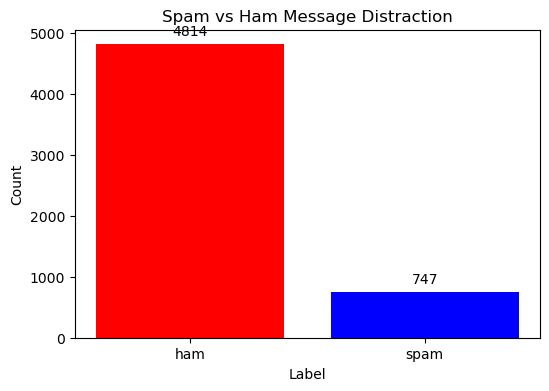

In [248]:
label_counts = df["label"].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(label_counts.index, label_counts.values, color=['red', 'blue'])
plt.title("Spam vs Ham Message Distraction")
plt.xlabel("Label")  
plt.ylabel("Count")

for  bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha="center", va="bottom")

plt.show()

Split Data into Train/Test Sets

In [249]:
x_train, x_test, y_train, y_test = train_test_split(
    df["message"], df["label_encoded"], test_size=0.2, random_state=42, stratify=df["label_encoded"]
)
        
print("Training Samples:", len(x_train))
print("Testing Samples", len(x_test))


Training Samples: 4448
Testing Samples 1113


Convert Text to Numbers (TF-IDF)

In [250]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print("TF-IDF transformation complete")
print("Training feature matrix shape", x_train_tfidf.shape)




TF-IDF transformation complete
Training feature matrix shape (4448, 7557)


In [251]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=30, random_state=42)
dt_model.fit(x_train_tfidf, y_train)
y_pred_dt = dt_model.predict(x_test_tfidf)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_tfidf, y_train)
y_pred_rf = rf_model.predict(x_test_tfidf)


print("Both models trained sucessfully")

Both models trained sucessfully


Evaluate Model Performance

In [252]:
dt_acc = accuracy_score(y_test, y_pred_dt)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("=== Decision Tree ===")
print(f"Accuracy: {dt_acc:.4f}")
print(classification_report(y_test, y_pred_dt, target_names=encoder.classes_))

print("\n=== Rand Forest ===")
print(f"Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, y_pred_rf, target_names=encoder.classes_))



=== Decision Tree ===
Accuracy: 0.9695
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       963
        spam       0.95      0.82      0.88       150

    accuracy                           0.97      1113
   macro avg       0.96      0.91      0.93      1113
weighted avg       0.97      0.97      0.97      1113


=== Rand Forest ===
Accuracy: 0.9739
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       963
        spam       1.00      0.81      0.89       150

    accuracy                           0.97      1113
   macro avg       0.99      0.90      0.94      1113
weighted avg       0.97      0.97      0.97      1113



Confusion Matrics (Matplotlib Only)

TF-IDF transformation complete
Training feature matrix shape (4448, 7557)
=== Decision Tree ===
Accuracy: 0.9695
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       963
        spam       0.95      0.82      0.88       150

    accuracy                           0.97      1113
   macro avg       0.96      0.91      0.93      1113
weighted avg       0.97      0.97      0.97      1113


=== Rand Forest ===
Accuracy: 0.9739
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       963
        spam       1.00      0.81      0.89       150

    accuracy                           0.97      1113
   macro avg       0.99      0.90      0.94      1113
weighted avg       0.97      0.97      0.97      1113



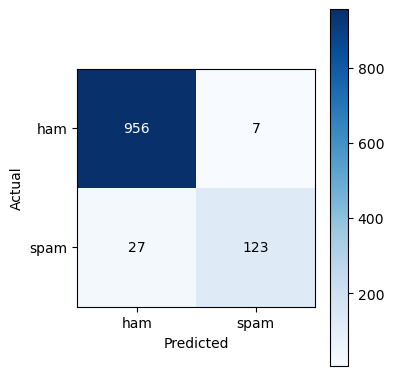

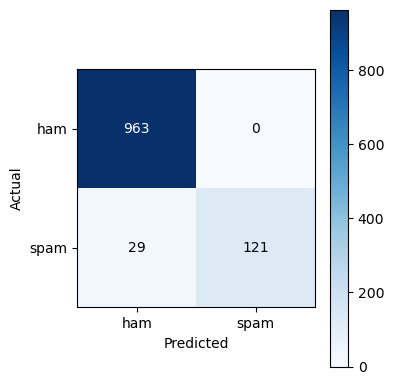

In [253]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
x_train_tfidif = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print("TF-IDF transformation complete")
print("Training feature matrix shape", x_train_tfidif.shape)


dt_acc = accuracy_score(y_test, y_pred_dt)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("=== Decision Tree ===")
print(f"Accuracy: {dt_acc:.4f}")
print(classification_report(y_test, y_pred_dt, target_names=encoder.classes_))

print("\n=== Rand Forest ===")
print(f"Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, y_pred_rf, target_names=encoder.classes_))


cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

def plot_confussion_matrix(cm, title):
    plt.figure(figsize=(4,4))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(encoder.classes_))
    plt.xticks(tick_marks, encoder.classes_)
    plt.yticks(tick_marks, encoder.classes_)

    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[i]):
            plt.text(j, i, cm[i, j],
                     ha='center', va='center',
                     color='white' if cm[i, j] > thresh else 'black')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

plot_confussion_matrix(cm_dt, "Decision Tree Confusion Matrix")
plot_confussion_matrix(cm_rf, "Random Forest Confussion Matrix")





Compare Models Accuracy (Matplototlib)

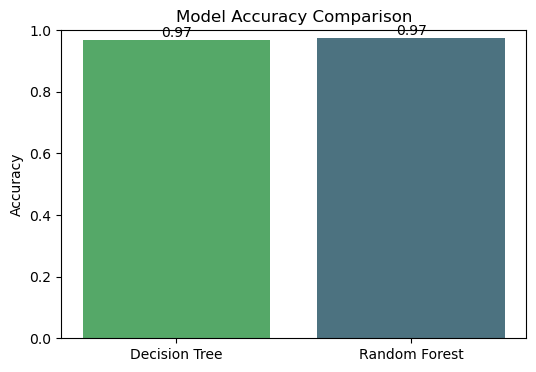

In [254]:
models = ['Decision Tree', 'Random Forest']
scores = [dt_acc, rf_acc]

plt.figure(figsize=(6,4))
bars = plt.bar(models, scores, color=['#55A868', '#4C7280'])
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{scores[i]:.2f}", ha='center')

plt.show()

Save the Best Model 

In [255]:
import joblib, os


os.makedirs("models", exist_ok=True)

best_model = rf_model if rf_acc >= dt_acc else dt_model
best_name = "random_forest" if rf_acc >= dt_acc else "decision_tree"

joblib.dump(best_model, f"models/{best_name}.joblib")
print(f"Saved best model as {best_name}.joblib")

Saved best model as random_forest.joblib


Predict New Message

In [256]:
loaded_model = joblib.load(f"models/{best_name}.joblib")

sample_msgs = [
    "Congratulations! You’ve won a free gift card, click the link to claim.",
    "Hey Blessing, please send me the updated report tomorrow."
]

sample_tfidf = vectorizer.transform(sample_msgs)
preds = loaded_model.predict(sample_tfidf)

for msg, pred in zip(sample_msgs, preds):
    print(f"[{encoder.inverse_transform([pred])[0].upper()}] {msg}")


[SPAM] Congratulations! You’ve won a free gift card, click the link to claim.
[HAM] Hey Blessing, please send me the updated report tomorrow.
